# 📊 Outlier Detection from Scratch – Educational Notebook

A beginner-friendly Python notebook that explains **multiple outlier detection methods** from scratch — with code, math, and visualization. Perfect for learners, educators, and data science practitioners who want to understand the intuition *and* implementation of common techniques.

---

### 🧠 What's Inside

| Method                        | Type         | Strengths                                  |
|------------------------------|--------------|---------------------------------------------|
| Z-Score                      | Univariate   | Simple, effective for normal distributions |
| IQR (Interquartile Range)    | Univariate   | Robust against skewed data                 |
| MAD (Median Absolute Dev.)   | Univariate   | Great for heavy-tailed distributions       |


---

## 🔢 Core Math Behind the Methods

### 🔹 Z-Score

$$ 
z = \frac{x - \mu}{\sigma}
$$  
Outlier if \( |z| > 3 \)

### 🔹 IQR (Interquartile Range)

$$ 
\text{IQR} = Q3 - Q1
$$  

Outlier if:  
$$ 
x < Q1 - 1.5 \times \text{IQR} \quad \text{or} \quad x > Q3 + 1.5 \times \text{IQR}
$$

### 🔹 MAD (Median Absolute Deviation)

$$ 
\text{MAD} = \text{median}(|x_i - \text{median}(x)|)
$$

Outlier if:  
$$ 
\frac{|x - \text{median}|}{\text{MAD}} > 3.5
$$

---

## 📐 1. Z-Score Outlier Detection

The **Z-score** measures how far a data point is from the mean of a dataset, in terms of standard deviations.

### 📘 Formula

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

- \( x \): Individual data point  
- \( \mu \): Mean of the dataset  
- \( \sigma \): Standard deviation  
- \( z \): Z-score

---

### ⚠️ Outlier Rule

A data point is flagged as an outlier if:

$$
|z| > 3
$$

---

### 🧠 Example

Given the dataset:

$$
\text{data} = [10, 12, 11, 10, 13, 12, 100, 13, 12]
$$

#### Step 1: Calculate Mean

$$
\mu = \frac{193}{9} \approx 21.44
$$

#### Step 2: Calculate Standard Deviation

$$
\sigma \approx 26.14
$$

#### Step 3: Z-score for 100

$$
z = \frac{100 - 21.44}{26.14} \approx 3.01
$$

✅ **100 is an outlier**

---

## 📐 2. IQR Outlier Detection

The **IQR method** uses quartiles and is robust to outliers and skewed data.

### 📘 Formula

$$
\text{IQR} = Q3 - Q1
$$

Outlier thresholds:

$$
\text{Lower} = Q1 - 1.5 \times \text{IQR}, \quad \text{Upper} = Q3 + 1.5 \times \text{IQR}
$$

---

### 🧠 Example

Data:  
$$
[10, 12, 11, 10, 13, 12, 100, 13, 12]
$$

- Q1 = 11, Q3 = 13  
- IQR = 2  
- Lower = 8, Upper = 16

✅ 100 is an outlier

---

## 📐 3. MAD (Median Absolute Deviation)

MAD is robust and works well with non-normal and heavy-tailed distributions.

### 📘 Formula

$$
\text{MAD} = \text{median}(|x_i - \text{median}(x)|)
$$

Outlier if:

$$
\frac{|x - \text{median}|}{\text{MAD}} > 3.5
$$

---

### 🧠 Example

Data:  
$$
[10, 11, 12, 11, 13, 12, 100]
$$

- Median = 12  
- MAD = median([2,1,0,1,1,0,88]) = 1  
- Score for 100 = $$ \frac{88}{1} = 88 $$

✅ 100 is an outlier

---


## 📊 Visualizations Included

- 📦 Boxplot of 1D data (IQR)
- 📈 Histogram (Z-score, MAD)

---

## 📦 Dependencies

```bash
pip install -r ML_Basics/requirements.txt
```

---

## 👨‍💻 Author

Built with ❤️ by **Rupam Bose**  
Contributions welcome — star, fork, and explore!

---

## 📘 License

MIT License — use freely, just give credit ✨


In [26]:
# Outlier Detection from Scratch - Educational Notebook

import math
import random
import matplotlib.pyplot as plt


# 1. Z-Score Method
def z_score_outliers(data, threshold=3):
    mean = sum(data) / len(data)
    std_dev = (sum((x - mean)**2 for x in data) / len(data))**0.5
    outliers = [x for x in data if abs((x - mean) / std_dev) > threshold]
    return outliers

# 2. IQR Method
def iqr_outliers(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    def percentile(p):
        k = (n - 1) * p
        f = int(k)
        c = f + 1
        if c >= n: return sorted_data[f]
        return sorted_data[f] + (sorted_data[c] - sorted_data[f]) * (k - f)

    q1 = percentile(0.25)
    q3 = percentile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower or x > upper]
    return outliers

# 3. MAD Method
def mad_outliers(data, threshold=3.5):
    sorted_data = sorted(data)
    n = len(sorted_data)
    median = sorted_data[n // 2] if n % 2 else (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
    deviations = [abs(x - median) for x in data]
    deviations_sorted = sorted(deviations)
    mad = deviations_sorted[n // 2] if n % 2 else (deviations_sorted[n // 2 - 1] + deviations_sorted[n // 2]) / 2
    outliers = [x for x in data if abs(x - median) / (mad if mad else 1) > threshold]
    return outliers


# Visualization Support
def plot_data_with_outliers(data, outliers, title="Outlier visualization"):
    # Create an index for the data points (e.g., [0, 1, 2, ..., n-1])
    indices = range(len(data))
    
    plt.figure(figsize=(8, 6))
    
    # Plot the entire dataset as blue points
    plt.scatter(indices, data, color='blue', label='Data', zorder=2)

    # Plot outliers as red points
    outlier_indices = [i for i, val in enumerate(data) if val in outliers]
    plt.scatter(outlier_indices, outliers, color='red', label='Outliers', zorder=3)
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()




Original Data: 1-D [10, 12, 12, 13, 12, 11, 14, 10, 11, 45, 13, 11, 12, 13, 12]
Z-Score Outliers: [45]
IQR Outliers: [45]
MAD Outliers: [45]


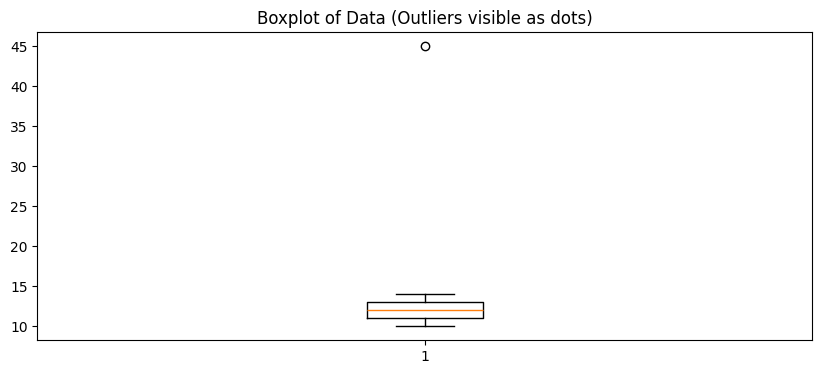

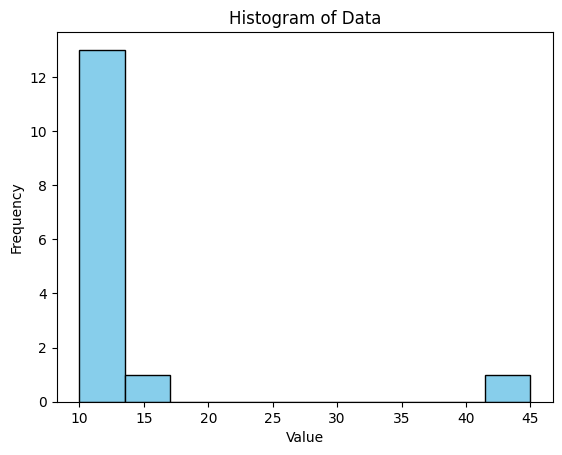

In [29]:

# Sample Data for Testing (1D and 2D)
data = [10, 12, 12, 13, 12, 11, 14, 10, 11, 45, 13, 11, 12, 13, 12]

# Run and Print
print("Original Data: 1-D", data)

print("Z-Score Outliers:", z_score_outliers(data))
print("IQR Outliers:", iqr_outliers(data))
print("MAD Outliers:", mad_outliers(data))


# Visualization (1D)
plt.figure(figsize=(10, 4))
plt.boxplot(data)
plt.title("Boxplot of Data (Outliers visible as dots)")
plt.show()

plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()



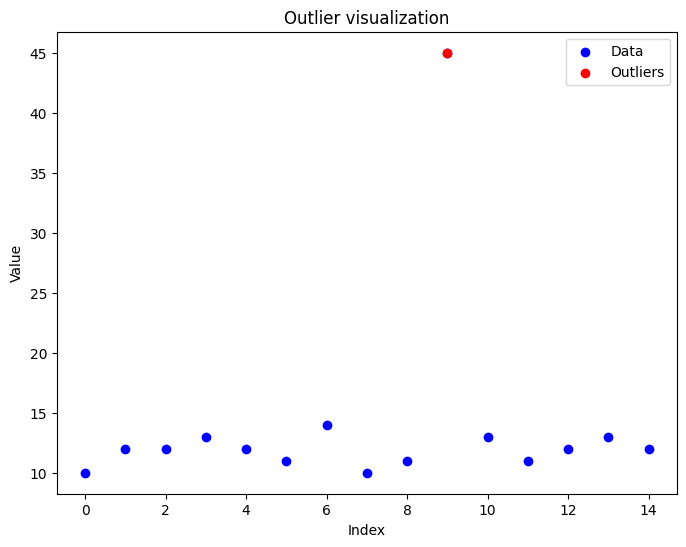

In [30]:
plot_data_with_outliers(data,iqr_outliers(data))